In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from custom_transformers import binary_label_encoder, gender_encoder

In [77]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
pipe = pickle.load(open('pipe.pkl','rb'))


In [79]:
df=pd.read_csv('../data/modle_build.csv')

In [80]:
X=df.drop(columns=['Churn'])
y=df['Churn']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)


In [83]:
X_train[0:5]

array([[0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 

## Supervised_learning Classifiers.


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [85]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)

    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [86]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])


In [87]:
from sklearn.linear_model import LogisticRegression
# ML Model - 1 Implementation
LR_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.7073853136315821
Test ROC AUC: 0.7435874212013622


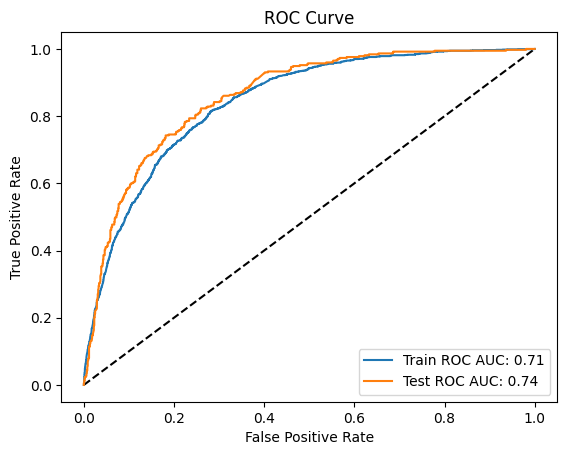


Confusion Matrix:


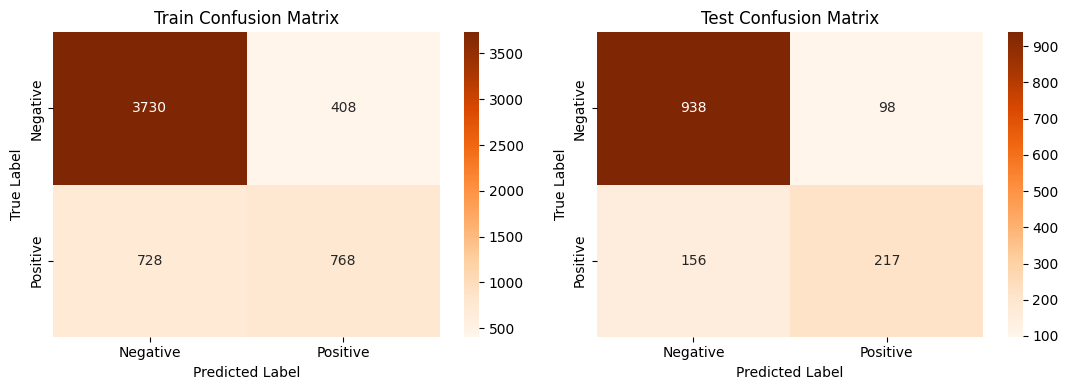


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.836698 | 0.901402 |   0.867846 | 4138        |
| 1            |    0.653061 | 0.513369 |   0.57485  | 1496        |
| accuracy     |    0.798367 | 0.798367 |   0.798367 |    0.798367 |
| macro avg    |    0.74488  | 0.707385 |   0.721348 | 5634        |
| weighted avg |    0.787937 | 0.798367 |   0.790046 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.857404 | 0.905405 |   0.880751 | 1036       |
| 1            |    0.688889 | 0.581769 |   0.630814 |  373       |
| accuracy     |    0.81973  | 0.81973  |   0.81973  |    0.81973 |
| macro avg    |    0.773146 | 0.743587 |   0.755783 | 1409       |
| weighted avg |    0.812794 | 0.81973  |   0.8145

In [88]:
lr_score = evaluate_model(LR_model, X_train, X_test, y_train, y_test)

In [89]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.787937
Precision Test,0.812794
Recall Train,0.798367
Recall Test,0.819730
Accuracy Train,0.798367
Accuracy Test,0.819730
ROC-AUC Train,0.707385
ROC-AUC Test,0.743587
F1 macro Train,0.790046
F1 macro Test,0.814586


In [90]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)


Train ROC AUC: 0.917138307275984
Test ROC AUC: 0.67146531824816


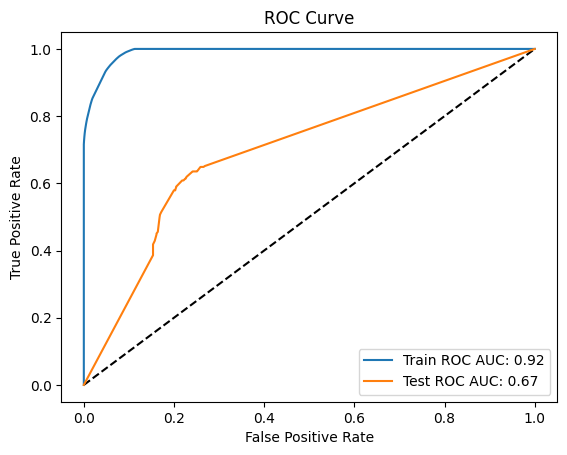


Confusion Matrix:


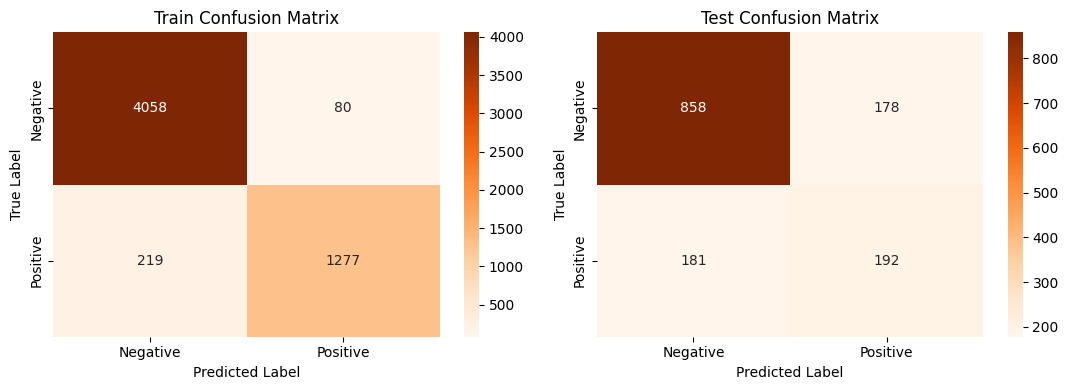


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.948796 | 0.980667 |   0.964468 | 4138        |
| 1            |    0.941046 | 0.85361  |   0.895198 | 1496        |
| accuracy     |    0.946929 | 0.946929 |   0.946929 |    0.946929 |
| macro avg    |    0.944921 | 0.917138 |   0.929833 | 5634        |
| weighted avg |    0.946738 | 0.946929 |   0.946075 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.825794 | 0.828185 |   0.826988 | 1036        |
| 1            |    0.518919 | 0.514745 |   0.516824 |  373        |
| accuracy     |    0.745209 | 0.745209 |   0.745209 |    0.745209 |
| macro avg    |    0.672356 | 0.671465 |   0.671906 | 1409        |
| weighted avg |    0.744556 | 0.745209 |   

In [92]:
DT_score=evaluate_model(decision_tree, X_train, X_test, y_train, y_test)

In [93]:
score['Decision Tree'] = DT_score
score

,Logistic regression,Decision Tree
Precision Train,0.787937,0.946738
Precision Test,0.812794,0.744556
Recall Train,0.798367,0.946929
Recall Test,0.819730,0.745209
Accuracy Train,0.798367,0.946929
Accuracy Test,0.819730,0.745209
ROC-AUC Train,0.707385,0.917138
ROC-AUC Test,0.743587,0.671465
F1 macro Train,0.790046,0.946075
F1 macro Test,0.814586,0.744879



Train ROC AUC: 0.9272603533702246
Test ROC AUC: 0.6912542569379031


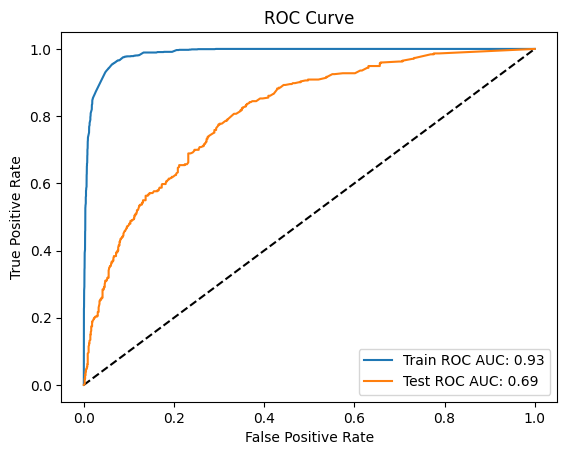


Confusion Matrix:


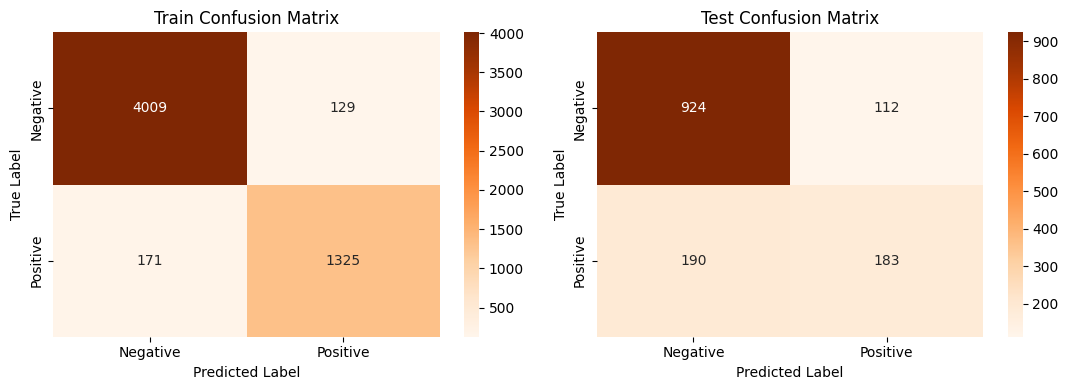


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.959091 | 0.968826 |   0.963934 | 4138        |
| 1            |    0.911279 | 0.885695 |   0.898305 | 1496        |
| accuracy     |    0.946752 | 0.946752 |   0.946752 |    0.946752 |
| macro avg    |    0.935185 | 0.92726  |   0.931119 | 5634        |
| weighted avg |    0.946395 | 0.946752 |   0.946507 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.829443 | 0.891892 |   0.859535 | 1036        |
| 1            |    0.620339 | 0.490617 |   0.547904 |  373        |
| accuracy     |    0.785664 | 0.785664 |   0.785664 |    0.785664 |
| macro avg    |    0.724891 | 0.691254 |   0.70372  | 1409        |
| weighted avg |    0.774088 | 0.785664 |   

In [95]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_score = evaluate_model(random_forest, X_train, X_test, y_train, y_test)

In [96]:
score['Random Forest'] = random_score
score

,Logistic regression,Decision Tree,Random Forest
Precision Train,0.787937,0.946738,0.946395
Precision Test,0.812794,0.744556,0.774088
Recall Train,0.798367,0.946929,0.946752
Recall Test,0.819730,0.745209,0.785664
Accuracy Train,0.798367,0.946929,0.946752
Accuracy Test,0.819730,0.745209,0.785664
ROC-AUC Train,0.707385,0.917138,0.927260
ROC-AUC Test,0.743587,0.671465,0.691254
F1 macro Train,0.790046,0.946075,0.946507
F1 macro Test,0.814586,0.744879,0.777038



Train ROC AUC: 0.7253536416104295
Test ROC AUC: 0.7296999699814714


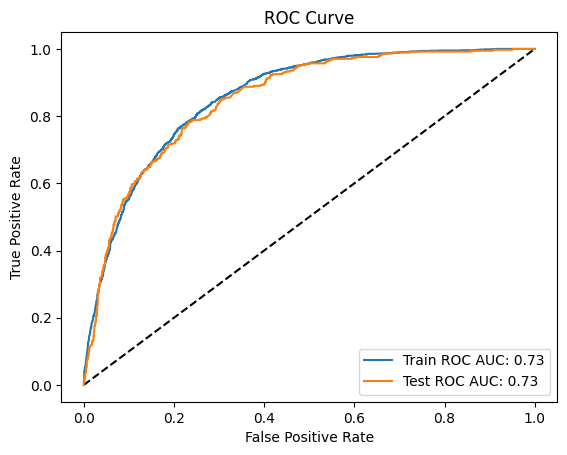


Confusion Matrix:


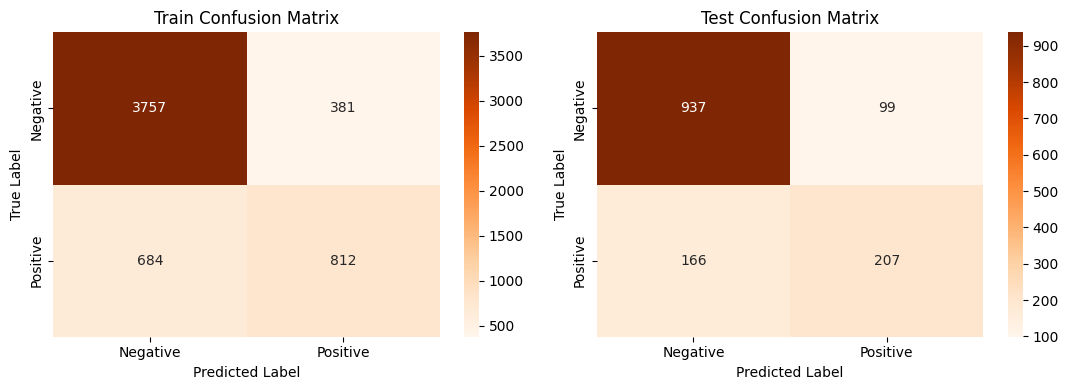


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.845981 | 0.907927 |   0.87586  | 4138        |
| 1            |    0.680637 | 0.542781 |   0.603942 | 1496        |
| accuracy     |    0.810969 | 0.810969 |   0.810969 |    0.810969 |
| macro avg    |    0.763309 | 0.725354 |   0.739901 | 5634        |
| weighted avg |    0.802077 | 0.810969 |   0.803657 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.849501 | 0.90444  |   0.87611  | 1036        |
| 1            |    0.676471 | 0.55496  |   0.60972  |  373        |
| accuracy     |    0.811923 | 0.811923 |   0.811923 |    0.811923 |
| macro avg    |    0.762986 | 0.7297   |   0.742915 | 1409        |
| weighted avg |    0.803695 | 0.811923 |   

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gb_score = evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)

In [98]:
score['Gradient Boosting'] = gb_score
score

,Logistic regression,Decision Tree,Random Forest,Gradient Boosting
Precision Train,0.787937,0.946738,0.946395,0.802077
Precision Test,0.812794,0.744556,0.774088,0.803695
Recall Train,0.798367,0.946929,0.946752,0.810969
Recall Test,0.819730,0.745209,0.785664,0.811923
Accuracy Train,0.798367,0.946929,0.946752,0.810969
Accuracy Test,0.819730,0.745209,0.785664,0.811923
ROC-AUC Train,0.707385,0.917138,0.927260,0.725354
ROC-AUC Test,0.743587,0.671465,0.691254,0.729700
F1 macro Train,0.790046,0.946075,0.946507,0.803657
F1 macro Test,0.814586,0.744879,0.777038,0.805590


In [99]:
from xgboost import XGBClassifier

model = XGBClassifier()


Train ROC AUC: 0.8763506292274809
Test ROC AUC: 0.7064808968294224


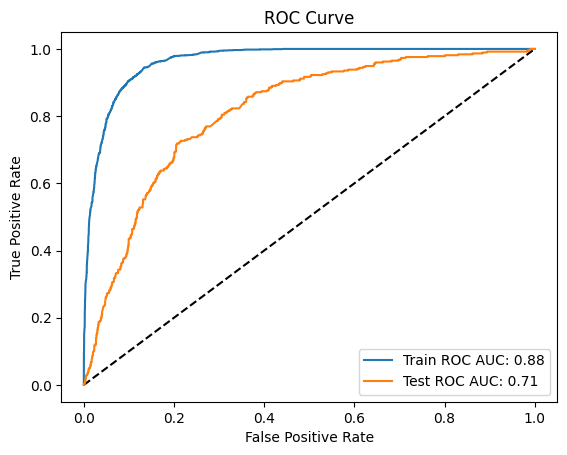


Confusion Matrix:


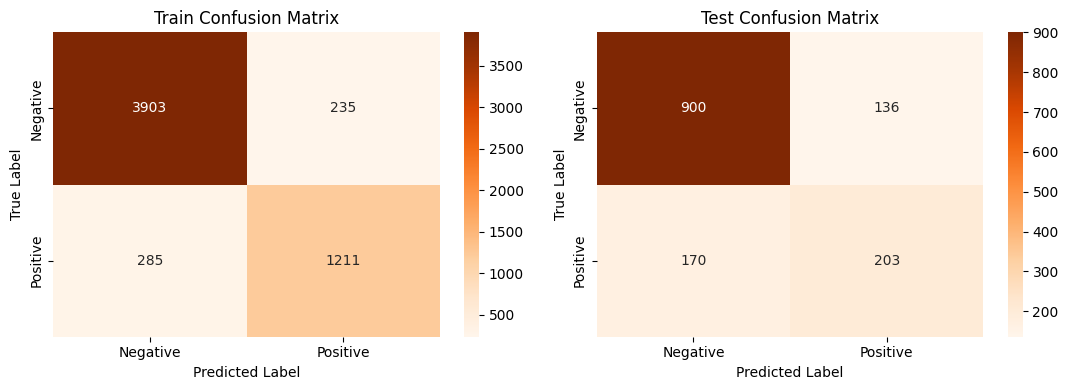


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.931948 | 0.943209 |   0.937545 | 4138        |
| 1            |    0.837483 | 0.809492 |   0.823249 | 1496        |
| accuracy     |    0.907703 | 0.907703 |   0.907703 |    0.907703 |
| macro avg    |    0.884716 | 0.876351 |   0.880397 | 5634        |
| weighted avg |    0.906865 | 0.907703 |   0.907196 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.841121 | 0.868726 |   0.854701 | 1036        |
| 1            |    0.59882  | 0.544236 |   0.570225 |  373        |
| accuracy     |    0.782825 | 0.782825 |   0.782825 |    0.782825 |
| macro avg    |    0.719971 | 0.706481 |   0.712463 | 1409        |
| weighted avg |    0.776978 | 0.782825 |   

In [100]:
xg_score = evaluate_model(model, X_train, X_test, y_train, y_test)

In [101]:
score['XGBoost'] = xg_score
score

,Logistic regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost
Precision Train,0.787937,0.946738,0.946395,0.802077,0.906865
Precision Test,0.812794,0.744556,0.774088,0.803695,0.776978
Recall Train,0.798367,0.946929,0.946752,0.810969,0.907703
Recall Test,0.819730,0.745209,0.785664,0.811923,0.782825
Accuracy Train,0.798367,0.946929,0.946752,0.810969,0.907703
Accuracy Test,0.819730,0.745209,0.785664,0.811923,0.782825
ROC-AUC Train,0.707385,0.917138,0.927260,0.725354,0.876351
ROC-AUC Test,0.743587,0.671465,0.691254,0.729700,0.706481
F1 macro Train,0.790046,0.946075,0.946507,0.803657,0.907196
F1 macro Test,0.814586,0.744879,0.777038,0.805590,0.779392


In [102]:
# to find best model
score.T.sort_values(by='ROC-AUC Test', ascending=False)


,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.787937,0.812794,0.798367,0.819730,0.798367,0.819730,0.707385,0.743587,0.790046,0.814586
Gradient Boosting,0.802077,0.803695,0.810969,0.811923,0.810969,0.811923,0.725354,0.729700,0.803657,0.805590
XGBoost,0.906865,0.776978,0.907703,0.782825,0.907703,0.782825,0.876351,0.706481,0.907196,0.779392
Random Forest,0.946395,0.774088,0.946752,0.785664,0.946752,0.785664,0.927260,0.691254,0.946507,0.777038
Decision Tree,0.946738,0.744556,0.946929,0.745209,0.946929,0.745209,0.917138,0.671465,0.946075,0.744879


In [104]:
#BEST MODEL IS logistic regression


Train ROC AUC: 0.762753681155225
Test ROC AUC: 0.7766608527332387


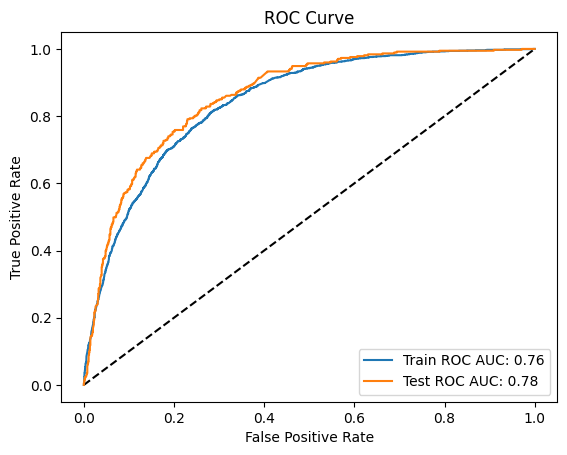


Confusion Matrix:


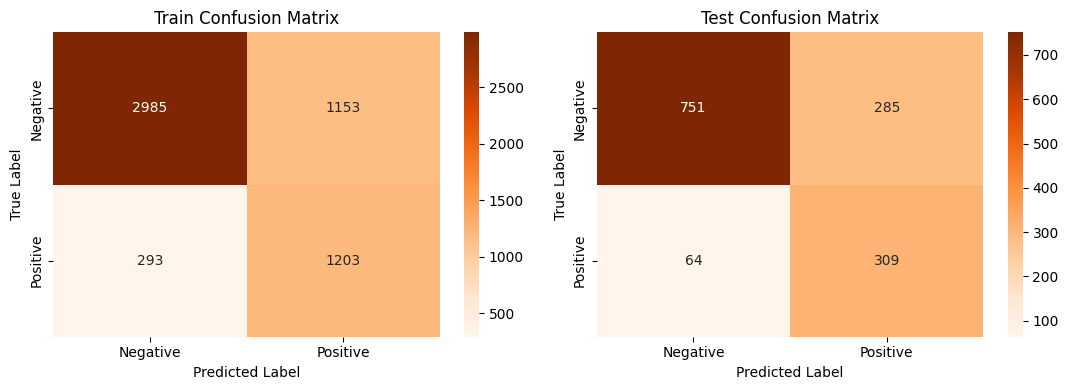


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.910616 | 0.721363 |   0.805016 | 4138        |
| 1            |    0.510611 | 0.804144 |   0.624611 | 1496        |
| accuracy     |    0.743344 | 0.743344 |   0.743344 |    0.743344 |
| macro avg    |    0.710614 | 0.762754 |   0.714813 | 5634        |
| weighted avg |    0.804403 | 0.743344 |   0.757113 | 5634        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.921472 | 0.724903 |   0.811453 | 1036        |
| 1            |    0.520202 | 0.828418 |   0.63909  |  373        |
| accuracy     |    0.752307 | 0.752307 |   0.752307 |    0.752307 |
| macro avg    |    0.720837 | 0.776661 |   0.725272 | 1409        |
| weighted avg |    0.815245 | 0.752307 |   

In [105]:
model = LogisticRegression(class_weight='balanced')
LR_balanced_score = evaluate_model(model, X_train, X_test, y_train, y_test)

In [106]:
score['Logistic regression balanced'] = LR_balanced_score
score

,Logistic regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost,Logistic regression balanced
Precision Train,0.787937,0.946738,0.946395,0.802077,0.906865,0.804403
Precision Test,0.812794,0.744556,0.774088,0.803695,0.776978,0.815245
Recall Train,0.798367,0.946929,0.946752,0.810969,0.907703,0.743344
Recall Test,0.819730,0.745209,0.785664,0.811923,0.782825,0.752307
Accuracy Train,0.798367,0.946929,0.946752,0.810969,0.907703,0.743344
Accuracy Test,0.819730,0.745209,0.785664,0.811923,0.782825,0.752307
ROC-AUC Train,0.707385,0.917138,0.927260,0.725354,0.876351,0.762754
ROC-AUC Test,0.743587,0.671465,0.691254,0.729700,0.706481,0.776661
F1 macro Train,0.790046,0.946075,0.946507,0.803657,0.907196,0.757113
F1 macro Test,0.814586,0.744879,0.777038,0.805590,0.779392,0.765824



Train ROC AUC: 0.7721121314644755
Test ROC AUC: 0.7770904282298384


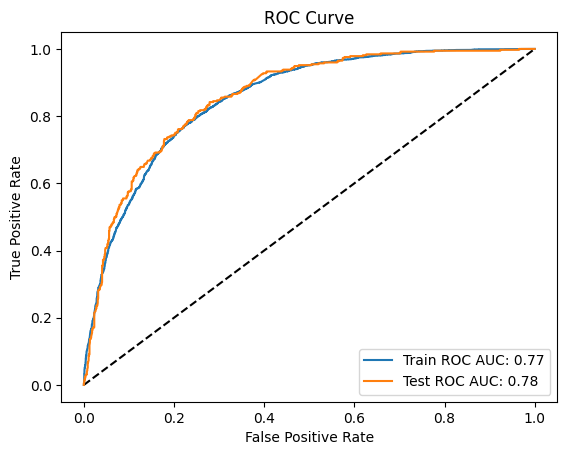


Confusion Matrix:


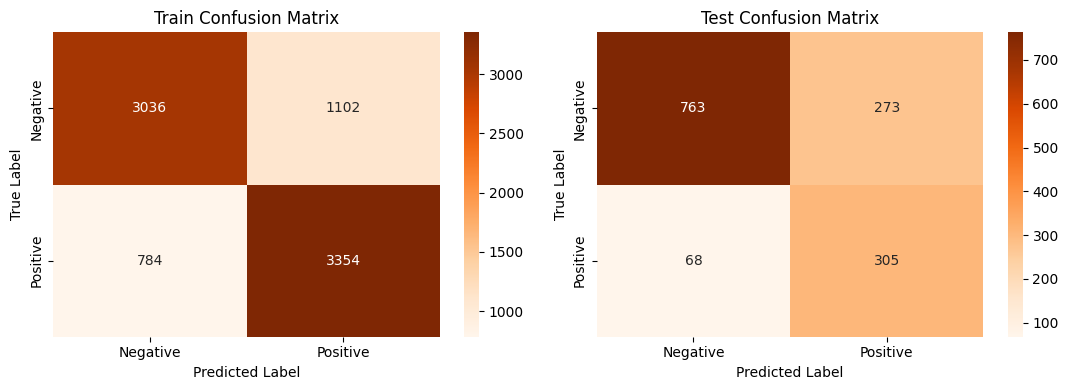


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.794764 | 0.733688 |   0.763006 | 4138        |
| 1            |    0.752693 | 0.810536 |   0.780545 | 4138        |
| accuracy     |    0.772112 | 0.772112 |   0.772112 |    0.772112 |
| macro avg    |    0.773729 | 0.772112 |   0.771775 | 8276        |
| weighted avg |    0.773729 | 0.772112 |   0.771775 | 8276        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.918171 | 0.736486 |   0.817354 | 1036        |
| 1            |    0.527682 | 0.817694 |   0.64143  |  373        |
| accuracy     |    0.757984 | 0.757984 |   0.757984 |    0.757984 |
| macro avg    |    0.722926 | 0.77709  |   0.729392 | 1409        |
| weighted avg |    0.814798 | 0.757984 |   

In [107]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train your logistic regression model on the resampled data
LR_model_smote = LogisticRegression()
LR_model_smote_score = evaluate_model(LR_model_smote, X_resampled, X_test, y_resampled, y_test)

In [108]:
score['Logistic regression SMOTE'] = LR_model_smote_score
score

,Logistic regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost,Logistic regression balanced,Logistic regression SMOTE
Precision Train,0.787937,0.946738,0.946395,0.802077,0.906865,0.804403,0.773729
Precision Test,0.812794,0.744556,0.774088,0.803695,0.776978,0.815245,0.814798
Recall Train,0.798367,0.946929,0.946752,0.810969,0.907703,0.743344,0.772112
Recall Test,0.819730,0.745209,0.785664,0.811923,0.782825,0.752307,0.757984
Accuracy Train,0.798367,0.946929,0.946752,0.810969,0.907703,0.743344,0.772112
Accuracy Test,0.819730,0.745209,0.785664,0.811923,0.782825,0.752307,0.757984
ROC-AUC Train,0.707385,0.917138,0.927260,0.725354,0.876351,0.762754,0.772112
ROC-AUC Test,0.743587,0.671465,0.691254,0.729700,0.706481,0.776661,0.777090
F1 macro Train,0.790046,0.946075,0.946507,0.803657,0.907196,0.757113,0.771775
F1 macro Test,0.814586,0.744879,0.777038,0.805590,0.779392,0.765824,0.770782


In [109]:
from sklearn.model_selection import  GridSearchCV

In [110]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # L1 and L2 regularization
    'solver': ['liblinear', 'saga'], # Solvers that work with both l1 and l2
    'max_iter': [100, 200, 300]      # Maximum number of iterations
}

In [111]:
grid_search = GridSearchCV(estimator=LR_model_smote, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [112]:
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [113]:
# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score:  0.7705406687391451


In [115]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [116]:
print('accuracy_score: ',accuracy_score(y_test, y_pred))

accuracy_score:  0.7558552164655784


In [117]:
with open('Best_LogisticRegression_Model.pkl','wb') as f:
    pickle.dump(best_model,f)

print('Model refinement completed and best model saved')

Model refinement completed and best model saved
